<a href="https://colab.research.google.com/github/Komal73/stock-price-prediction-project/blob/main/Stock_Price_Prediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#@title Hello Everyone Welcome in Stock Market, This is a Stock Price Prediction Machine Learning Model only .....    {run: "auto" }
#@title Please run the cell   {run: "auto" }

!pip install sequential
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install --upgrade yfinance

In [27]:
#@title Please Enter the Company quoto from Yahoo Finance  {run: "auto" }
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
Yahoo_finance_Company_Quoto = "GOOG" #@param ["AAPL", "SBIN.NS", "TCS.NS", "TTM", "MSFT", "AMZN", "TSLA", "NFLX", "META", "GOOG", "NVDA"] {allow-input: true}

In [28]:
#@title  Please enter the dates{run: "auto" }
import yfinance as yf
from datetime import date
from datetime import timedelta
Today_date = date.today()
start_date = '2010-01-01' #@param{type:"date"}
end_date = "2024-02-08" #@param{type:"date"}

from keras.backend import transpose
#Get stock quote
#df = web.DataReader
df = yf.download(Yahoo_finance_Company_Quoto,  start= start_date , end= end_date)
#show the data
print("The historical data of ", Yahoo_finance_Company_Quoto, "is ......")
print(df)

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

The historical data of  GOOG is ......
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04   15.615220   15.678981   15.547723   15.610239   15.610239   
2010-01-05   15.620949   15.637387   15.480475   15.541497   15.541497   
2010-01-06   15.588072   15.588072   15.102393   15.149715   15.149715   
2010-01-07   15.178109   15.193053   14.760922   14.797037   14.797037   
2010-01-08   14.744733   15.024933   14.672753   14.994298   14.994298   
...                ...         ...         ...         ...         ...   
2024-02-01  143.690002  144.619995  142.259995  142.710007  142.710007   
2024-02-02  140.889999  143.880005  138.169998  143.539993  143.539993   
2024-02-05  144.039993  146.669998  143.910004  144.929993  144.929993   
2024-02-06  145.960007  146.740005  144.520004  145.410004  145.410004   
2024-02-07  146.119995  147.000000  145.210007  146.679993  146.679993   

The Graphical representation of the historical data is .....


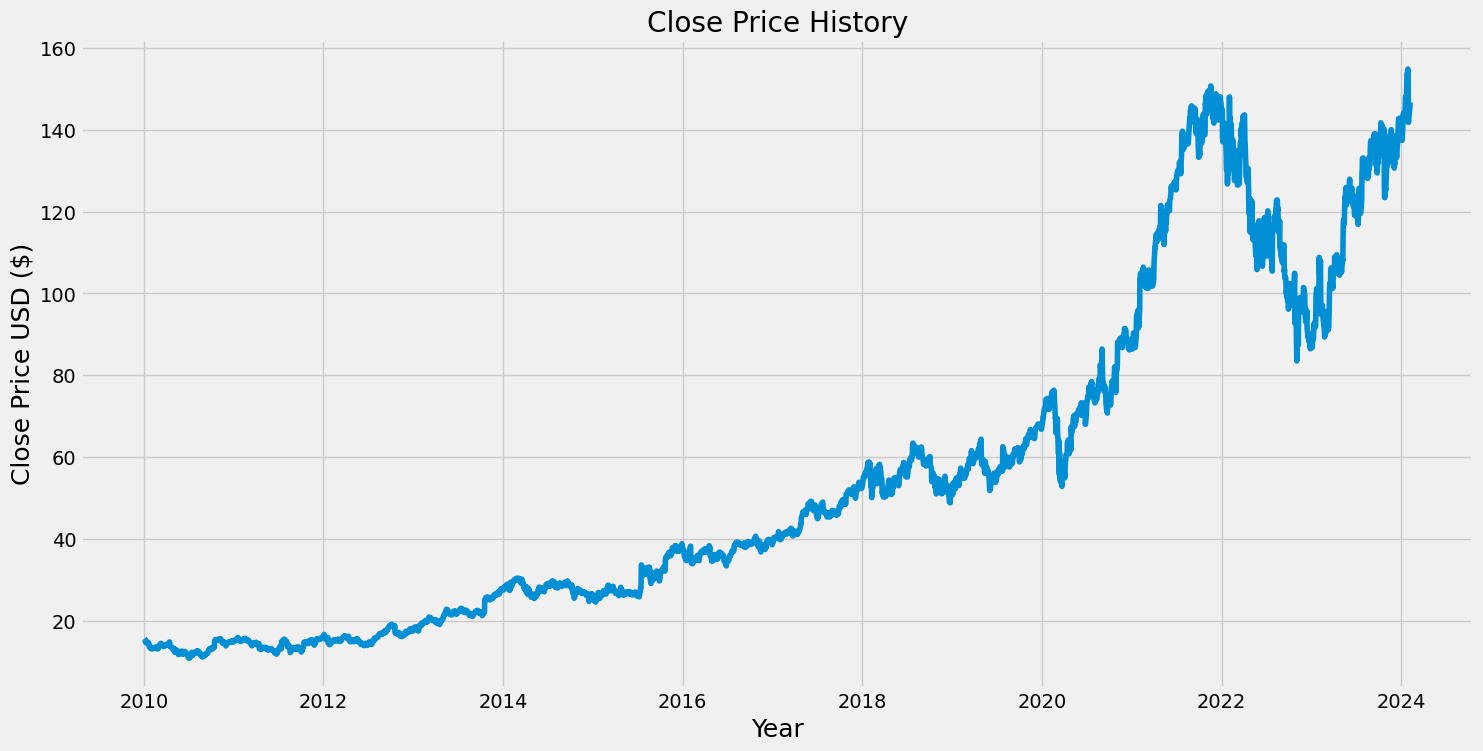

In [29]:
#@title Please run the cell to see the graphical representation of historical data  {run: "auto" }
#get the number of rows and columns in data set
df.shape
print("The Graphical representation of the historical data is .....")
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize = 18)
plt.show()

In [30]:
#@title Please run the cell and wait till the model is trained  {run: "auto" }
#create a new data
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)* .8)

#Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

from os import X_OK
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])

 #Convert x_train and Y_train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



In [31]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=2)

#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

#Convert the data in numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print("The model is trained.")

Epoch 1/2
2779/2779 [==============================] - 24s 7ms/step - loss: 3.9826e-04
Epoch 2/2
2779/2779 [==============================] - 20s 7ms/step - loss: 2.1646e-04
The model is trained.


In [32]:
#@title Please run the cell and wait the model prediction is trained  {run: "auto" }
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print("the model prediction is trained.")
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("The Root mean square value(RMSE) is : " )
rmse

23/23 [==============================] - 1s 4ms/step
the model prediction is trained.
The Root mean square value(RMSE) is : 


2.792675023690938

<ipython-input-33-8c3be423bea7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


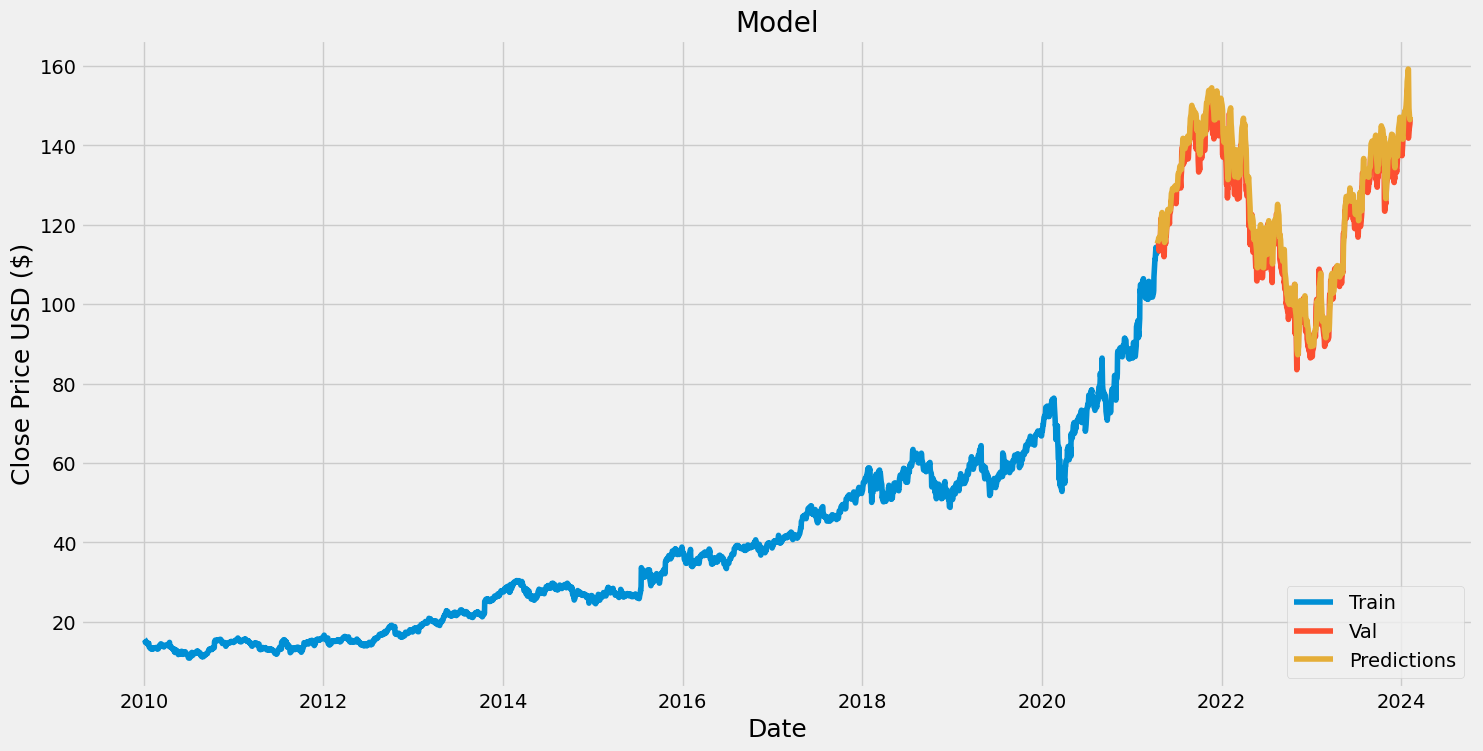

In [33]:
#@title If RMSE value is grater than 5 then Please rerun the cells from model training cell to get best Predictions  {run: "auto" }
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [34]:
#@title The Predicton of alredy existing data is ...  {run: "auto" }
print(valid)

apple_quote = yf.download(Yahoo_finance_Company_Quoto,start='2012-01-01', end = end_date)
Price_type = "High" #@param['Open','Close','High','Low','Adj Close','Volume']
new_df = apple_quote.filter([Price_type])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print("\nThe highest Predcition of ",Price_type," price from the all above dates is ......")
print(pred_price)

                 Close  Predictions
Date                               
2021-04-15  114.833000   115.288696
2021-04-16  114.888000   115.633423
2021-04-19  115.120003   116.123787
2021-04-20  114.681503   116.594620
2021-04-21  114.664497   116.748032
...                ...          ...
2024-02-01  142.710007   153.905594
2024-02-02  143.539993   149.321640
2024-02-05  144.929993   146.829666
2024-02-06  145.410004   146.450714
2024-02-07  146.679993   147.165268

[709 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 20ms/step

The highest Predcition of  High  price from the all above dates is ......
[[149.59694]]


In [35]:
#@title Todays Price prediction is .. {run: "auto" }
apple_quote2 = yf.download(Yahoo_finance_Company_Quoto,start=end_date, end = Today_date)
Price_type = "Close" #@param['Open','Close','High','Low','Adj Close','Volume']
print(apple_quote2[Price_type])

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

Date
2024-02-08    147.220001
2024-02-09    150.220001
Name: Close, dtype: float64
